In [105]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd

In [106]:
filepath = "pointchecker_anchorGroup_rotate.png"
bin_img = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
color_img = cv.imread(filepath)

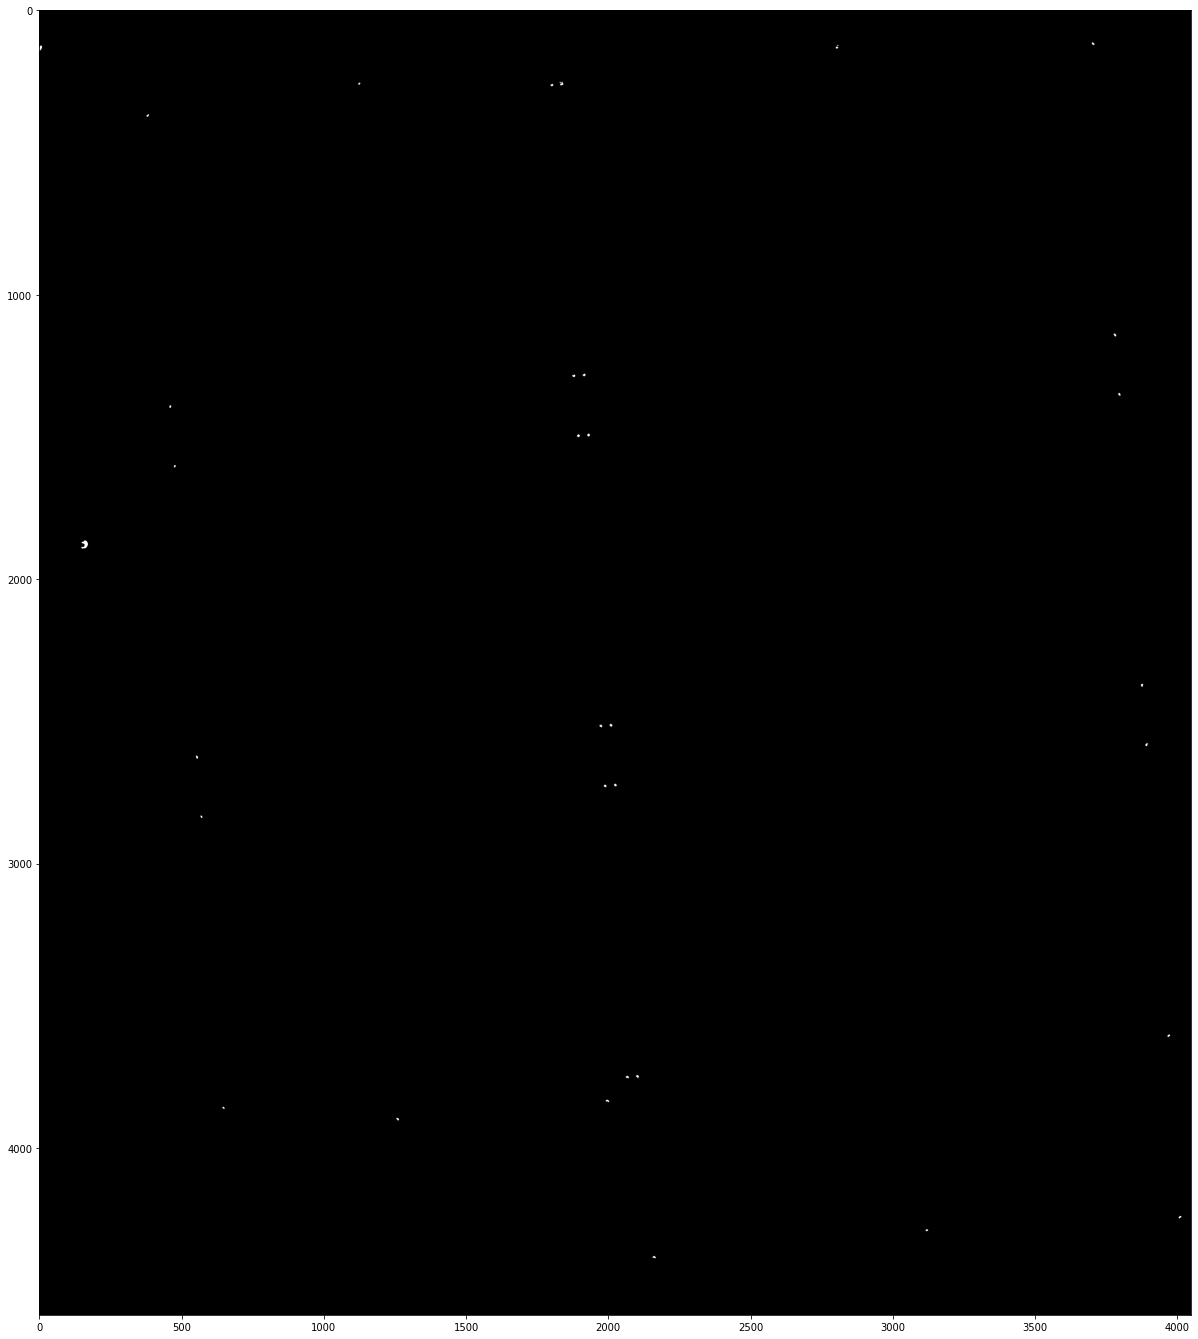

In [107]:
plt.figure(figsize = (24, 24))
plt.imshow(bin_img, cmap='gray')

In [108]:
n, labels, bboxes, centroids = cv.connectedComponentsWithStats(bin_img)
print(n)

36


In [109]:
# [pixel] to [m]
RESOLUTION = 0.002  # [m/pixel]
centroids_m = centroids * RESOLUTION

In [110]:
# draw bounding box and center[m]
green = (0, 255, 0)
white = (255, 255, 255)
for i in range(n):
    x, y, w, h, area = bboxes[i]
    cx, cy = centroids_m[i]
    text = '[%s] x=%f, y=%f' % (i, cx, cy)
    cv.rectangle(color_img, (x,y), (x+w,y+h), green, 1)
    cv.putText(color_img, text, (x,y-h), 0, 0.5, white)
cv.imwrite('cxcy.png', color_img)

True

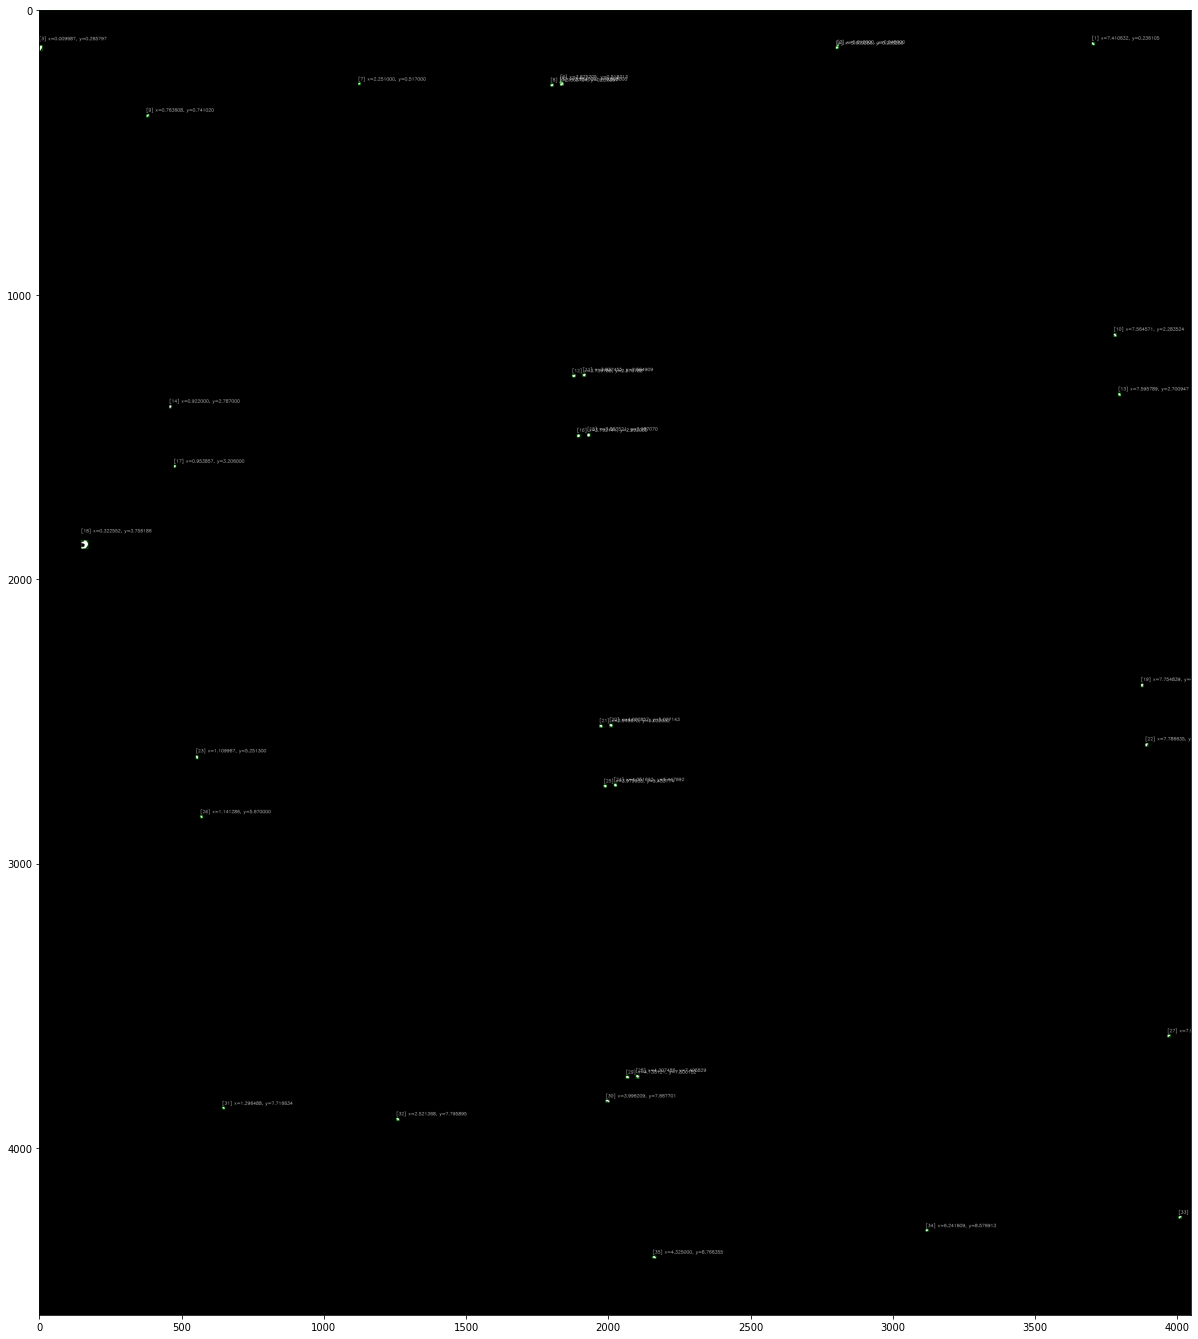

In [111]:
plt.figure(figsize = (24, 24))
plt.imshow(color_img)

In [112]:
# save cx, cy
df = pd.DataFrame()
df['cx'] = np.transpose(centroids_m)[0]
df['cy'] = np.transpose(centroids_m)[1]
df.to_csv('cxcy.csv')